## Step 1: Getting data: Safari


In [ ]:
# Set up code checking
import os

user_path = "/Users/maximiliamgierschmann"
data_path = user_path + "/ml_data/bash_ping_catelca/timeout.csv"

if not os.path.exists(data_path):
    os.symlink(data_path, data_path)  
print("Setup Complete")

## Step 2: Pre-processing

In [2]:
import pandas as pd
import datetime

# Read the data
X = pd.read_csv(data_path, parse_dates=['Full Date'])

X.reset_index(inplace=True)
X['second'] = X['Full Date'].dt.second
X['minute'] = X['Full Date'].dt.minute
X['hour'] = X['Full Date'].dt.hour
X['day'] = X['Full Date'].dt.day
X['month'] = X['Full Date'].dt.month
X['year'] = X['Full Date'].dt.year
#Un-comment to remove outliers
#utliers = X.query('`Ping delay (ms)`>= 150')
# connection_failed = X.query('`Status` == 0')
X_reduced = X.query('`Ping delay (ms)` < 200')
# print(outliers.describe())
# print(connection_failed.describe())
# X.describe()


## Step 3: Analysis

#### 1. Ping last 13 recorded hours


Text(0.5, 1.0, 'Last 1000 seconds')

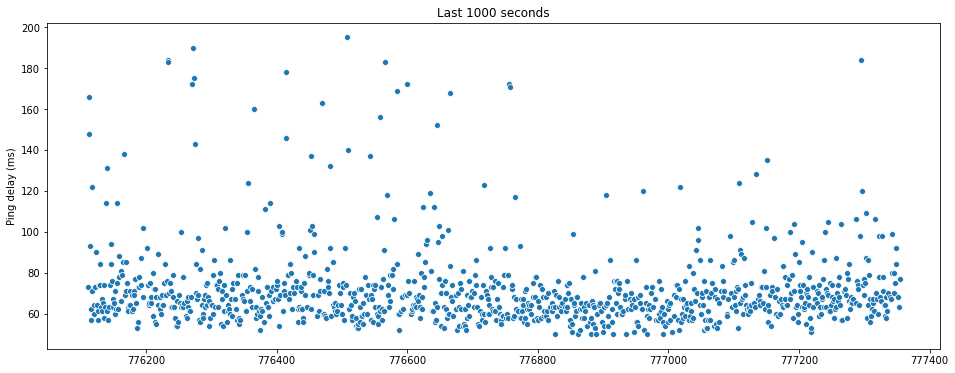

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the width and height of the figure
plt.figure(figsize=(16,6))

#only last 15000
X_reduced = X_reduced.iloc[-1000:]
sns.scatterplot(x=X_reduced.index, y = X_reduced['Ping delay (ms)']).set_title('Last 1000 seconds')


In [4]:

# Set the width and height of the figure
# swarm_plot = X.iloc[-10000:]

# plt.figure(figsize=(16,6))
# sns.swarmplot(x=swarm_plot['Status'], y = swarm_plot['Hour'])